In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
import os
os.chdir('/content/drive')

In [6]:
stopwords=open("/content/drive/MyDrive/한국어불용어100_.txt",'r',encoding='UTF8')

In [7]:
stop=stopwords.read()

In [8]:
stop=stop.split()
stop_list=[]
for i in range(len(stop)):
  if i%3==0:
    stop_list.append(stop[i])

In [25]:
## <추가 불용어 처리>
stop_list=stop_list+['.','!','ㅠ','?','%','vs','ㅊ',',','/']# <- 필요없는 단어 추가

In [10]:
def stopword(word_tokenize):
  test=[]
  for w in word_tokenize:
    if w not in stop_list:
      test.append(w)
  return test

In [26]:
test= '저희는 대구 동구에서 토지, 공장, 창고 매매, 임대관리를 전문으로하는 부동산 회사입니다. 이번에 사무실을 신축하여 이전을 준비중입니다. 주 고객의 연령층은 40대~이상 까지이며 건물의 외장은 은회색 ...'

In [27]:
word_tokenize(test)

['저희는',
 '대구',
 '동구에서',
 '토지',
 ',',
 '공장',
 ',',
 '창고',
 '매매',
 ',',
 '임대관리를',
 '전문으로하는',
 '부동산',
 '회사입니다',
 '.',
 '이번에',
 '사무실을',
 '신축하여',
 '이전을',
 '준비중입니다',
 '.',
 '주',
 '고객의',
 '연령층은',
 '40대~이상',
 '까지이며',
 '건물의',
 '외장은',
 '은회색',
 '...']

In [28]:
stopword(word_tokenize(test))

['저희는',
 '대구',
 '동구에서',
 '토지',
 '공장',
 '창고',
 '매매',
 '임대관리를',
 '전문으로하는',
 '부동산',
 '회사입니다',
 '이번에',
 '사무실을',
 '신축하여',
 '이전을',
 '준비중입니다',
 '고객의',
 '연령층은',
 '40대~이상',
 '까지이며',
 '건물의',
 '외장은',
 '은회색',
 '...']

In [ ]:
## 명사, 형용사, 부사등 형태소 태그붙여줌

In [12]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 60.1 MB/s 
     |████████████████████████████████| 86 kB 7.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [13]:
!pip install collection

  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5117 sha256=98184be1c4616563b0d46f7fe30db7fe7b99bc63866aa6f354d71cd7b4ef41af
  Stored in directory: /root/.cache/pip/wheels/45/ed/3c/29a1c0600bb908a2e7421dc3a3775cbaed434a71b4ed93a439
Successfully built collection


In [19]:
!pip install matplotlib

In [29]:
from konlpy.tag import Okt
from collections import Counter

In [30]:
Okt = Okt() # -> 자바 환경변수 세팅 필요

In [31]:
# token list에 문장단위로 들어감
token_list=stopword(word_tokenize(test))

morphs = []
for sentence in token_list:
  for i in range(len(sentence)):
    morphs.append(Okt.pos(sentence[i]))
print(morphs)

[[('저', 'Noun')], [('희', 'Adjective')], [('는', 'Verb')], [('대', 'Verb')], [('구', 'Noun')], [('동', 'Modifier')], [('구', 'Noun')], [('에', 'Josa')], [('서', 'Verb')], [('토', 'Noun')], [('지', 'Verb')], [('공', 'Noun')], [('장', 'Noun')], [('창', 'Noun')], [('고', 'Noun')], [('매', 'Noun')], [('매', 'Noun')], [('임', 'Noun')], [('대', 'Verb')], [('관', 'Noun')], [('리', 'Noun')], [('를', 'Noun')], [('전', 'Noun')], [('문', 'Noun')], [('으', 'Adverb')], [('로', 'Noun')], [('하', 'Exclamation')], [('는', 'Verb')], [('부', 'Noun')], [('동', 'Modifier')], [('산', 'Noun')], [('회', 'Noun')], [('사', 'Noun')], [('입', 'Noun')], [('니', 'Noun')], [('다', 'Adverb')], [('이', 'Noun')], [('번', 'Noun')], [('에', 'Josa')], [('사', 'Noun')], [('무', 'Noun')], [('실', 'Noun')], [('을', 'Josa')], [('신', 'Noun')], [('축', 'Noun')], [('하', 'Exclamation')], [('여', 'Noun')], [('이', 'Noun')], [('전', 'Noun')], [('을', 'Josa')], [('준', 'Noun')], [('비', 'Noun')], [('중', 'Noun')], [('입', 'Noun')], [('니', 'Noun')], [('다', 'Adverb')], [('고', 'Noun')

In [32]:

morphs = []
for sentence in token_list:
  morphs.append(Okt.pos(sentence))
print(morphs)

[[('저희', 'Noun'), ('는', 'Josa')], [('대구', 'Noun')], [('동구', 'Noun'), ('에서', 'Josa')], [('토지', 'Noun')], [('공장', 'Noun')], [('창고', 'Noun')], [('매매', 'Noun')], [('임대', 'Noun'), ('관리', 'Noun'), ('를', 'Josa')], [('전문', 'Noun'), ('으로', 'Josa'), ('하는', 'Verb')], [('부동산', 'Noun')], [('회사', 'Noun'), ('입니다', 'Adjective')], [('이번', 'Noun'), ('에', 'Josa')], [('사무실', 'Noun'), ('을', 'Josa')], [('신축', 'Noun'), ('하여', 'Verb')], [('이전', 'Noun'), ('을', 'Josa')], [('준비', 'Noun'), ('중', 'Suffix'), ('입니다', 'Adjective')], [('고객', 'Noun'), ('의', 'Josa')], [('연령', 'Noun'), ('층', 'Noun'), ('은', 'Josa')], [('40', 'Number'), ('대', 'Verb'), ('~', 'Punctuation'), ('이상', 'Noun')], [('까지이며', 'Verb')], [('건물', 'Noun'), ('의', 'Josa')], [('외', 'Noun'), ('장', 'Suffix'), ('은', 'Josa')], [('은회색', 'Noun')], [('...', 'Punctuation')]]


In [33]:
## 명사길이가 1이상인 것만 출력
noun_list=[]
for sentence in morphs:
  for word, tag in sentence :
    if tag in ['Noun'] and len(word) > 1:
      noun_list.append(word)

In [34]:
noun_list

['저희',
 '대구',
 '동구',
 '토지',
 '공장',
 '창고',
 '매매',
 '임대',
 '관리',
 '전문',
 '부동산',
 '회사',
 '이번',
 '사무실',
 '신축',
 '이전',
 '준비',
 '고객',
 '연령',
 '이상',
 '건물',
 '은회색']

In [35]:
counts = Counter(noun_list)
tags = counts.most_common(40) 

In [15]:
!pip install wordcloud

In [37]:
from wordcloud import WordCloud

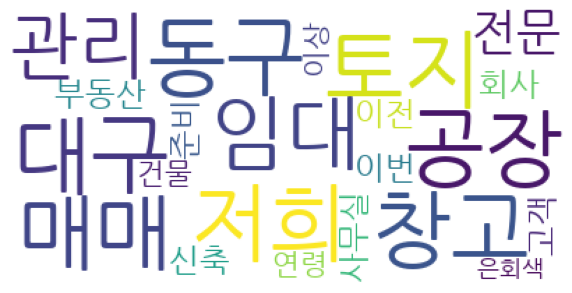

In [40]:
# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')


wc = WordCloud(font_path="/content/drive/MyDrive/NanumGothic.ttf",background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
# cloud.to_file('test.jpg')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def word_cloud(data):

  from konlpy.tag import Okt

  Okt = Okt() # -> 자바 환경변수 세팅 필요


  # token list에 문장단위로 들어감
  token_list =[]

  for i in data:
    token_list.append(stopword(word_tokenize(i)))

  # morphs는 단어뭉치
  morphs = []
  for sentence in token_list:
    for i in range(len(sentence)):
      morphs.append(Okt.pos(sentence[i]))

  # 명사길이가 1이상인 것만 취합
  noun_list =[]

  for sentence in morphs:
    for word, tag in sentence :
      if tag in ['Noun'] and len(word) > 1:
        noun_list.append(word)
  # 빈도 세기       
  counts = Counter(noun_list)
  tags = counts.most_common(40)
  
  # 폰트 지정
  font_path = '/content/drive/MyDrive/NanumGothic.ttf'

  # 워드클라우드 생성
  wc = WordCloud(font_path=font_path, background_color="white",width=500, max_font_size=60)
  cloud = wc.generate_from_frequencies(dict(tags))

  return cloud

In [44]:
test1='소설이라는 명칭은 원래 동양의 경우, 오늘날의 서사학적 개념과는 다소 다른 뜻을 가지고 있었다. 소설이라는 말이 처음으로 동양 기록에 나타난 것은 『장자 莊子』 외물편(外物篇)과 『한서 漢書』 예문지(藝文志) 등에서였다.이들 기록을 보면, 소설이라는 말은 본래 대도(大道)와 거리가 먼 꾸민 말로서, 명예를 구하는 속된 말 나부랭이 또는 패(稗), 즉 세미(細米)와 같은 가담항어(街談巷語)의 뜻을 가지고 있었다. 즉, 패관(稗官)들에 의하여 채집되어 제왕이나 통치자의 참고자료가 되는 시정이나 길거리에서 얻어들은 말이나 이야기와 같은 소도(小道) 및 잔총소어(殘叢小語)의 뜻이다.우리 나라의 경우에도 소설이라는 명칭은 이규보(李奎報)의 『백운소설 白雲小說』에서 처음 비롯되지만, 대개 패관문학(稗官文學)·패설(稗說)·패사(稗史)·야승(野乘)·수필 등의 포괄적이고 보잘것없는 속설로 인식되어 왔으며, 유학자들에 의해서 그 존재의미 자체가 긍정적이기보다는 부정적인 것으로 이해되어 왔다.그러다가 개화기에 이르면서부터 량치차오(梁啓超)의 「논소설여군치지관계 論小說與群治之關係」 등의 근대적 소설이론을 수용하면서 이러한 소설관에 변화가 두드러지게 일어나게 되고, 소설의 사회적인 효용성이 강조되었다.그러나 처음부터 그 평가가 부정적이기는 했지만 ‘외물편’이나 ‘예문지’에 나타나고 있는 설명은 소설의 원형으로서의 의미를 적지않게 암시하고 있다.그것은 첫째, 소설에는 곧 허구(虛構)라는 개념이 내재되어 있다는 점이다. ‘꾸민다[飾]’나 ‘만든다[所造]’라는 말에 이미 허구의 가능성이 내재된 것도 사실이며 의사(擬似) 역사담론의 의미를 지닌다.소설가의 원형이라고 할 수 있는 이른바 ‘패관’은 역사를 엄정한 사실에 근거하여 기록하는 사가(史家)인 태사공(太史公)에 비해서는 허구의 인간(Homofictor)이며, 사가라기보다는 일종의 작가인 것이다.'

In [45]:
word_cloud(test1)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

ValueError: ignored

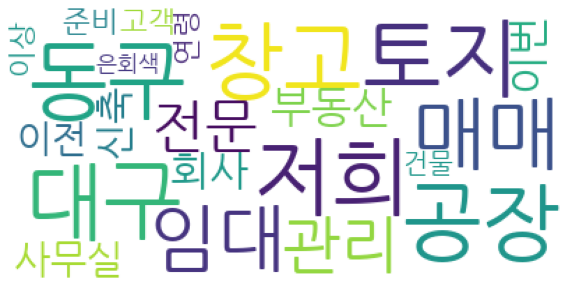

In [64]:
# 수정본
test= '저희는 대구 동구에서 토지, 공장, 창고 매매, 임대관리를 전문으로하는 부동산 회사입니다. 이번에 사무실을 신축하여 이전을 준비중입니다. 주 고객의 연령층은 40대~이상 까지이며 건물의 외장은 은회색 ...'
morphs=[]
for sentence in stopword(word_tokenize(test)):
    morphs.append(Okt.pos(sentence))
## 명사길이가 1이상인 것만 출력
noun_list=[]
for sentence in morphs:
  for word, tag in sentence :
    if tag in ['Noun'] and len(word) > 1:
      noun_list.append(word)
counts = Counter(noun_list)
tags = counts.most_common(40) 
wc = WordCloud(font_path="/content/drive/MyDrive/NanumGothic.ttf",background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()